In [40]:
import pandas as pd
from pca import pca
import seaborn as sns
import matplotlib.pyplot as plt

#### todo:
- Wat is PCA?
- loadings lijst (topx?)
- verklaarde variantie
- conclusie
- spelchecks
* article




# 1. Wat is pca, wat is dit hele ding?

# 2. Analyze stemhulpen

## 2.1 Check je stem

[Check je stem](https://checkjestem.nl/) is een stemhulp die niet de standpunten maar het stemgedrag van de partijen volgt. Het probleem met deze checker is dat bij de gekozen stemmingen BIJ1 (7) en NSC (3) niet altijd aanwezig waren. Deze stemmingen kunnen hierdoor *of* niet meegenomen worden in de analyse, *of* de analyse moet zonder de partijen plaatsvinden. Gezien het grote aantal gemiste stemmingen (7) en het feit dat de partij in de peilingen stabiel op 0 zetels staat is er besloten om BIJ1 weg te laten uit de analyse. NSC is wel meegenomen gezien het grote aantal zetels in de peilingen. 

Van de 26 stellingen blijven er hierdoor 23 over. Het stemgedrag van Groenlinks en de PvdA had 100% overlap en zijn daarom samengevoegd tot de 'GL-PvdA' combinatie waarmee ze in de verkiezingen ook op de lijst staan.


In [41]:
# Load data and prepare DataFrame for analysis
check_je_stem_df = pd.read_csv('data/check_je_stem.csv')
check_je_stem_df = check_je_stem_df.dropna(axis=1)
check_je_stem_labels = check_je_stem_df.columns[1:]
check_je_stem_df =check_je_stem_df.iloc[1:]
check_je_stem_questions = check_je_stem_df["vraag"]
check_je_stem_df = check_je_stem_df.iloc[:, 1:]

# Prepared DataFrame is assigned its own variable to allow the original to be used in the Merged model.
check_je_stem_prepared = pd.DataFrame(data=check_je_stem_df, columns=check_je_stem_labels)
check_je_stem_prepared = check_je_stem_prepared.rename(index=check_je_stem_questions)
check_je_stem_prepared = check_je_stem_prepared.transpose()

### How many components verhaal

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [25] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [82.43%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

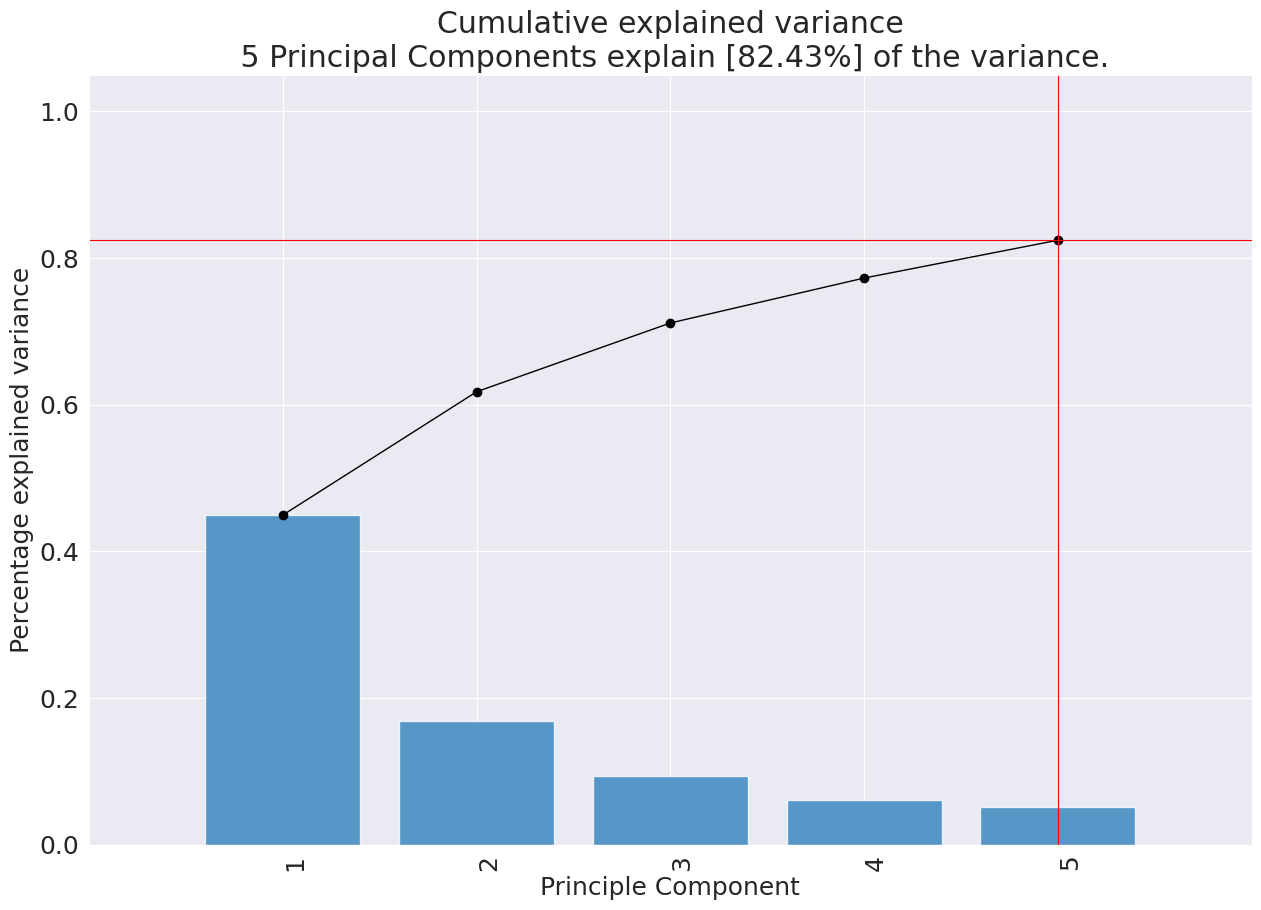

In [42]:
model = pca(n_components=5)
results = model.fit_transform(check_je_stem_prepared, row_labels=check_je_stem_labels)
model.plot()

### Scatterplot verhaal

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [25] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [61.77%] of the variance'}, xlabel='PC1 (44.9% expl.var)', ylabel='PC2 (16.8% expl.var)'>)

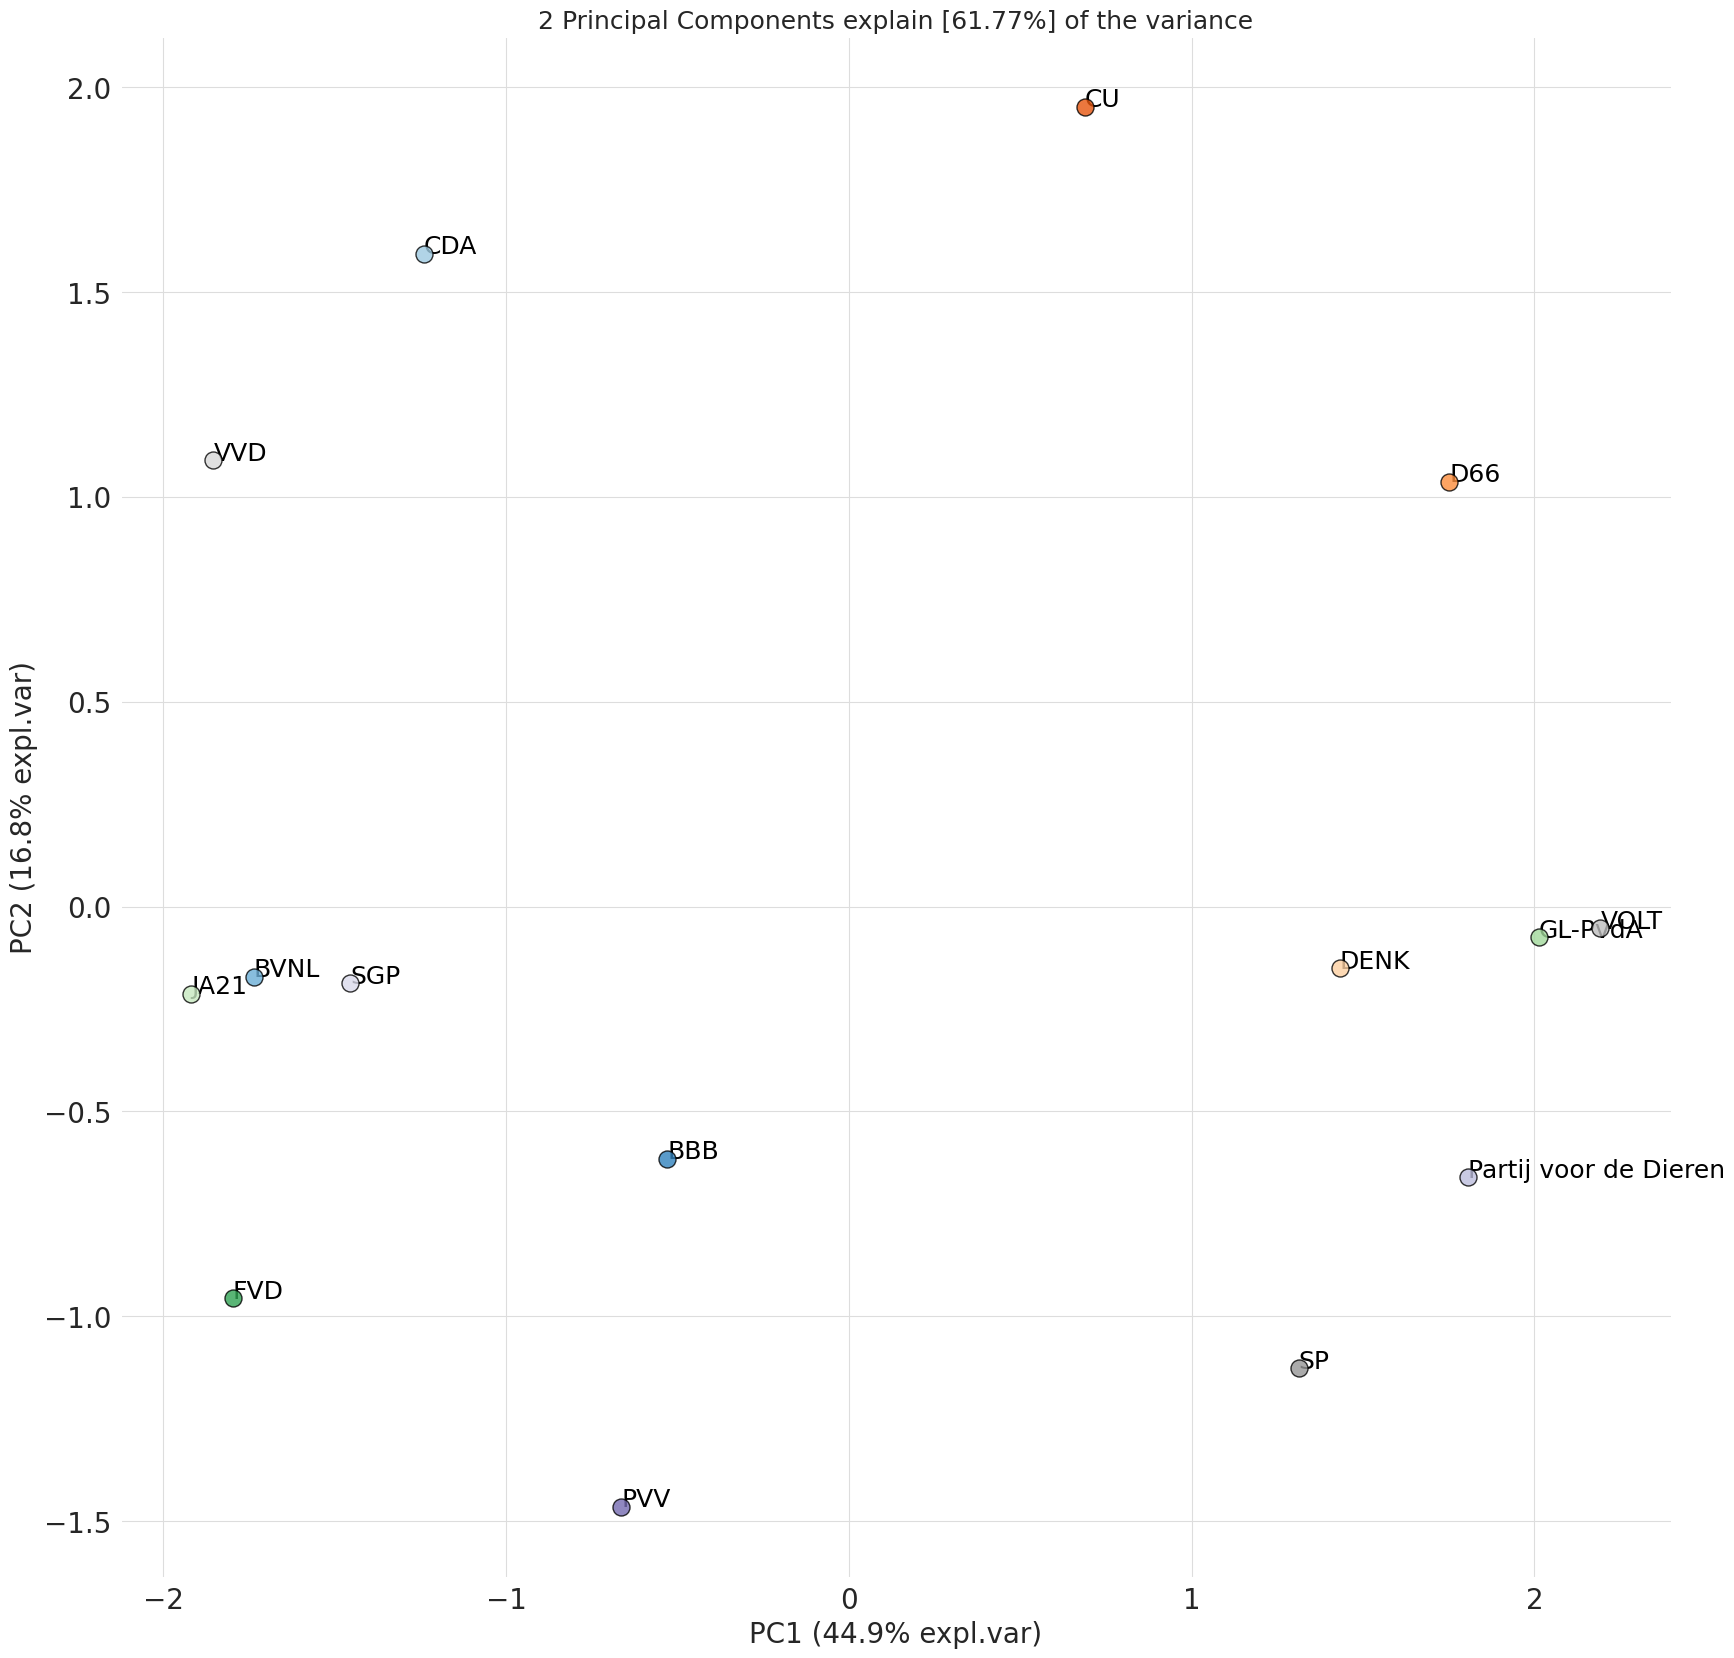

In [43]:
model = pca(n_components=2)
results = model.fit_transform(check_je_stem_prepared, row_labels=check_je_stem_labels)
model.scatter(legend=False, figsize=(20,20), labels=check_je_stem_labels)

### Analyse componenten

In [44]:
model.results["loadings"].iloc[0].sort_values(ascending=False)

Minderjarige asielzoekers niet vastzetten aan buitengrens EU              0.286925
De wolf actief beschermen                                                 0.283326
Ook niet-Oekraïense vluchtelingen eerder laten werken                     0.262011
Gratis menstruatie-artikelen voor lage inkomens                           0.253569
Belasting op winst en vermogen verhogen                                   0.229914
Diertransporten naar landen buiten de EU niet toestaan                    0.226314
Oekraïne moet kandidaat-lid van de EU worden                              0.217276
Meer transparantie over kernwapens in Nederland                           0.216484
Energiebedrijven nationaliseren                                           0.203449
Uitspreken dat abortus geen misdaad is                                    0.183203
Fossiele subsidies per direct afschaffen                                  0.161713
Koning moet ook belasting betalen over inkomen                            0.155525
Tijd

In [45]:
model.results["loadings"].iloc[1].sort_values(ascending=False)

Oekraïne moet kandidaat-lid van de EU worden                              0.195017
Handicap en seksualiteit toevoegen aan discriminatieverbod in grondwet    0.187627
Gratis menstruatie-artikelen voor lage inkomens                           0.136824
Verzetten tegen EU-wet voor natuurherstel                                 0.074018
Ook niet-Oekraïense vluchtelingen eerder laten werken                     0.053035
Minderjarige asielzoekers niet vastzetten aan buitengrens EU              0.022132
Borg mag maximaal twee maanden huur zijn                                  0.012294
Tijdelijk huurcontract afschaffen                                         0.002690
De wolf actief beschermen                                                -0.038966
Fossiele subsidies per direct afschaffen                                 -0.056737
Stoppen met werven van buitenlandse studenten                            -0.063723
Rechter moet extra eisen stellen bij rechtszaken tegen de Staat          -0.066455
Asie

In [46]:
model.results["topfeat"]

,PC,feature,loading,type
0,PC1,Asielzoekers opvangen buiten Europa (zoals Rwa...,-0.301174,best
1,PC2,Eigen bijdrage in de jeugdzorg niet instellen,-0.408150,best
2,PC1,Borg mag maximaal twee maanden huur zijn,0.046711,weak
3,PC2,Stikstofdeadline van 2030 niet heilig verklaren,-0.351413,weak
4,PC1,Uitspreken dat abortus geen misdaad is,0.183203,weak
5,PC2,Studieschuld niet meewegen bij aanvraag hypotheek,-0.390473,weak
6,PC1,Tijdelijk huurcontract afschaffen,0.144939,weak
7,PC1,Gratis menstruatie-artikelen voor lage inkomens,0.253569,weak
8,PC1,Rechter moet extra eisen stellen bij rechtszak...,-0.301174,weak
9,PC2,Verbied boa's om een hoofddoek te dragen,-0.262195,weak


### Correlatie stemgedrag van de partijen

<Axes: >

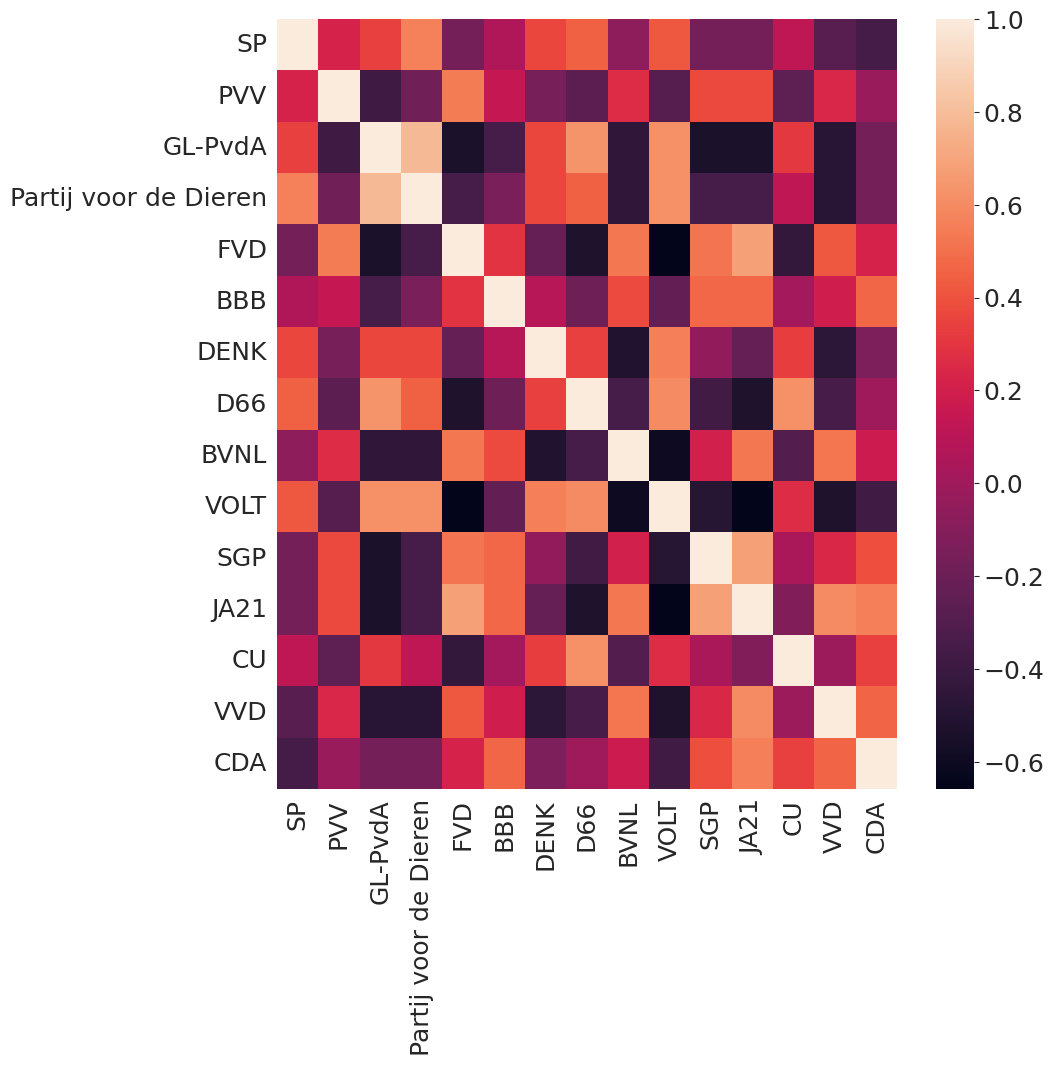

In [47]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(check_je_stem_df.corr())

In [48]:
check_je_stem_df.corr()

,SP,PVV,GL-PvdA,Partij voor de Dieren,FVD,BBB,DENK,D66,BVNL,VOLT,SGP,JA21,CU,VVD,CDA
SP,1.000000,0.216841,0.342105,0.561404,-0.164971,0.066750,0.359025,0.445286,-0.067925,0.417620,-0.164971,-0.164971,0.120756,-0.275344,-0.359025
PVV,0.216841,1.000000,-0.385496,-0.184717,0.542370,0.145144,-0.157207,-0.262575,0.262575,-0.286765,0.370734,0.370734,-0.255665,0.236814,-0.021437
GL-PvdA,0.342105,-0.385496,1.000000,0.780702,-0.539906,-0.350438,0.359025,0.633967,-0.445286,0.618399,-0.539906,-0.539906,0.309436,-0.483939,-0.163903
Partij voor de Dieren,0.561404,-0.184717,0.780702,1.000000,-0.352438,-0.141844,0.359025,0.445286,-0.445286,0.618399,-0.352438,-0.352438,0.120756,-0.483939,-0.163903
FVD,-0.164971,0.542370,-0.539906,-0.352438,1.000000,0.292440,-0.220176,-0.529043,0.529043,-0.659082,0.519231,0.679487,-0.438719,0.420828,0.220176
BBB,0.066750,0.145144,-0.350438,-0.141844,0.292440,1.000000,0.089087,-0.193829,0.373300,-0.236814,0.470757,0.470757,0.014358,0.190476,0.467707
DENK,0.359025,-0.157207,0.359025,0.359025,-0.220176,0.089087,1.000000,0.342475,-0.510355,0.557370,-0.053376,-0.220176,0.329044,-0.460283,-0.131944
D66,0.445286,-0.262575,0.633967,0.445286,-0.529043,-0.193829,0.342475,1.000000,-0.350649,0.601159,-0.367750,-0.529043,0.623377,-0.344584,-0.006715
BVNL,-0.067925,0.262575,-0.445286,-0.445286,0.529043,0.373300,-0.510355,-0.350649,1.000000,-0.601159,0.206456,0.529043,-0.298701,0.524055,0.174595
VOLT,0.417620,-0.286765,0.618399,0.618399,-0.659082,-0.236814,0.557370,0.601159,-0.601159,1.000000,-0.487446,-0.659082,0.262575,-0.527102,-0.378726


## 2.2 StemWijzer

De [StemWijzer](https://www.stemwijzer.nl/) is gemaakt door de organisatie ProDemos en bevat 30 stellingen. Vragen kunnen beantwoord worden met 'ja', 'geen mening' en 'nee' welke ik als '2', '1' en '0' heb gecodeerd.


In [49]:
# Load data and prepare DataFrame for analysis
stemwijzer_df = pd.read_csv('data/stemwijzer.csv')
stemwijzer_labels = stemwijzer_df.columns[1:]
stemwijzer_df =stemwijzer_df.iloc[1:]
stemwijzer_questions = stemwijzer_df["Stelling (0=Nee; 1=Geen mening; 2=Ja)"]
stemwijzer_df = stemwijzer_df.iloc[:, 1:]

# Prepared DataFrame is assigned its own variable to allow the original to be used in the Merged model.
stemwijzer_df_prepared = pd.DataFrame(data=stemwijzer_df, columns=stemwijzer_labels)
stemwijzer_df_prepared = stemwijzer_df_prepared.rename(index=stemwijzer_questions)
stemwijzer_df_prepared = stemwijzer_df_prepared.transpose()

### How many components verhaal

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [78.03%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

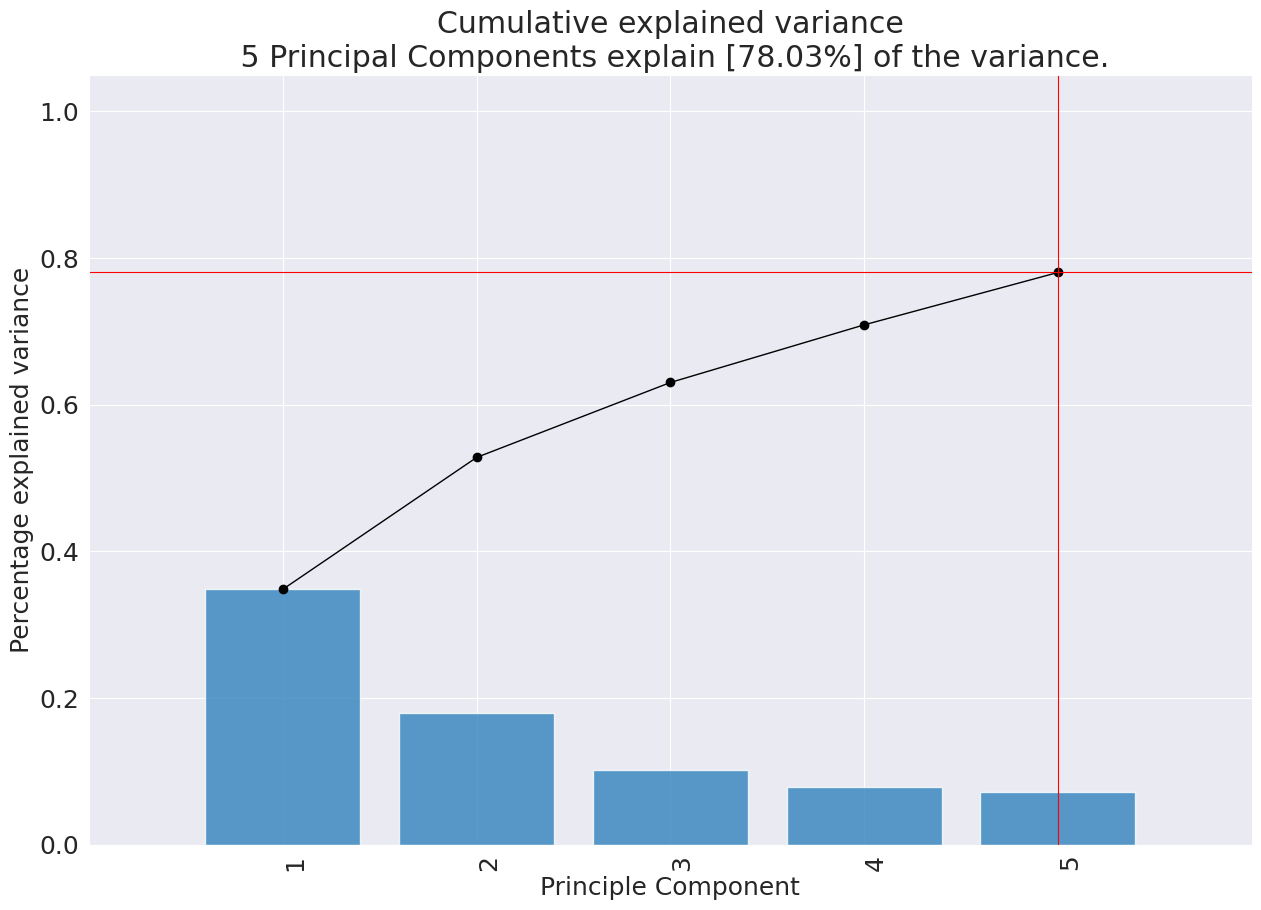

In [50]:
model = pca(n_components=5)
results = model.fit_transform(stemwijzer_df_prepared, row_labels=stemwijzer_labels)
model.plot()

### Scatterplot verhaal

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [52.81%] of the variance'}, xlabel='PC1 (34.8% expl.var)', ylabel='PC2 (17.9% expl.var)'>)

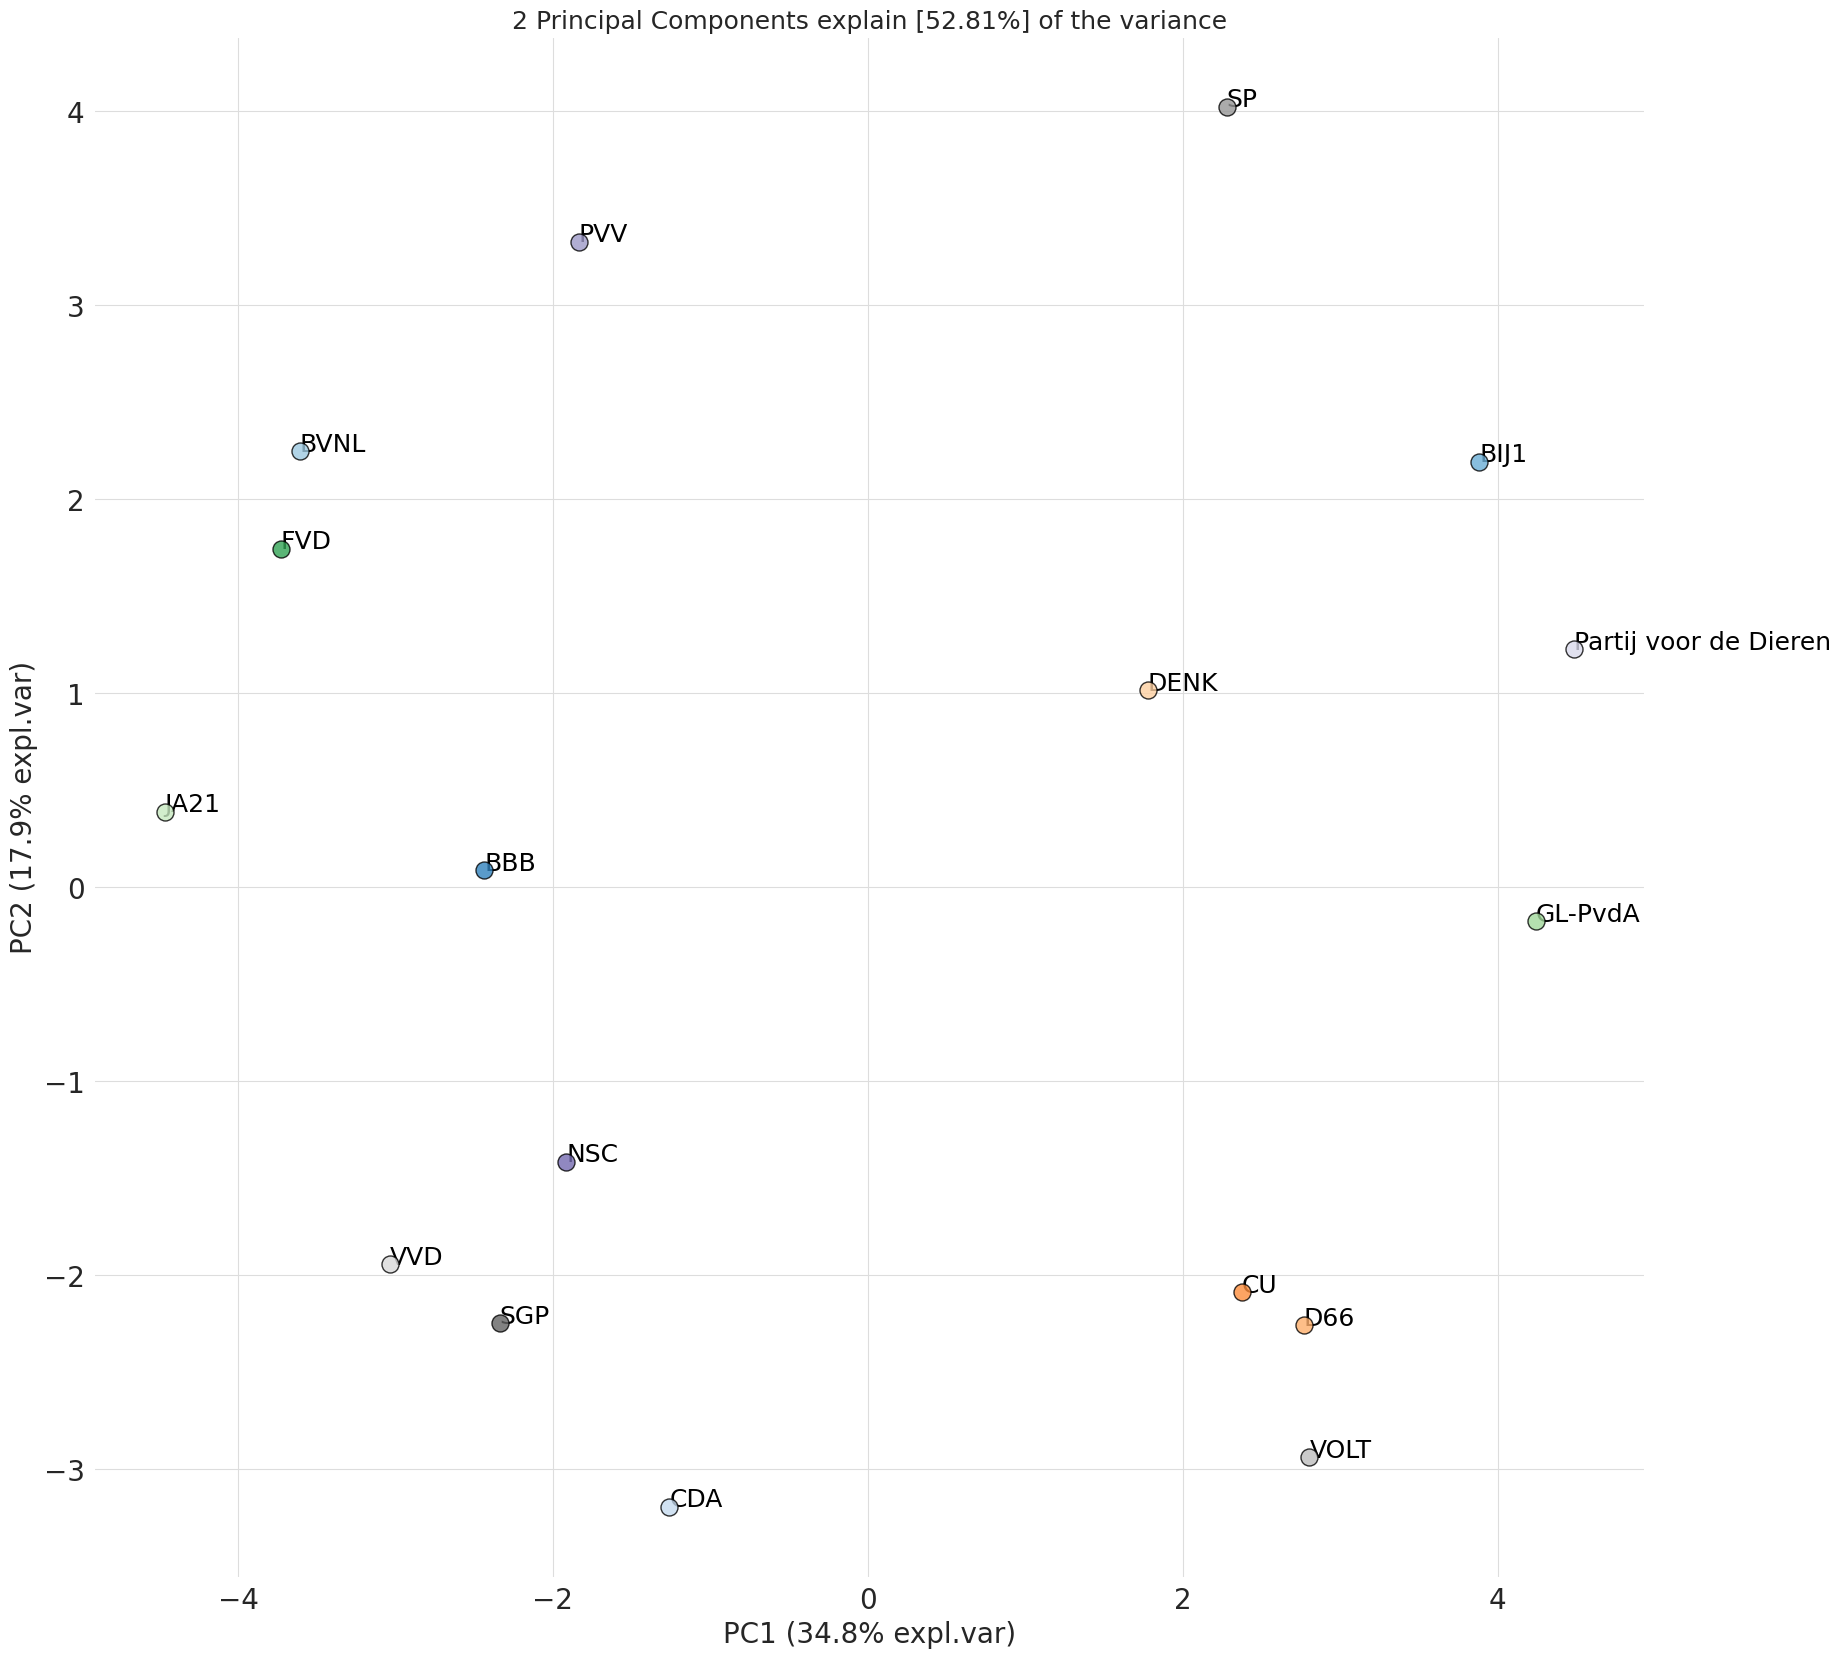

In [51]:
model = pca(n_components=2)
results = model.fit_transform(stemwijzer_df_prepared, row_labels=stemwijzer_labels)
model.scatter(legend=False, figsize=(20,20), labels=stemwijzer_labels)

### Analyse componenten

In [52]:
model.results["topfeat"]

,PC,feature,loading,type
0,PC1,Als een vluchteling in Nederland mag blijven m...,-0.310033,best
1,PC2,Het eigen risico bij zorgverzekeringen moet wo...,0.340240,best
2,PC1,De accijns op benzine gas en diesel moet omlaag,-0.210040,weak
3,PC1,Elke regio in Nederland moet een vast aantal m...,-0.115032,weak
4,PC2,Mensen vanaf 65 jaar moeten gratis met trein t...,0.321313,weak
5,PC2,De regering moet meer investeren in opslag van...,-0.147231,weak
6,PC1,De regering moet ervoor zorgen dat Surinamers ...,0.224623,weak
7,PC2,Er moet een wet komen waarin staat dat Nederla...,-0.287497,weak
8,PC1,De overheid moet meer geld geven aan scholen v...,0.233153,weak
9,PC1,In Nederland moeten meer kerncentrales komen,-0.187509,weak


In [53]:
model.results["loadings"].iloc[0].sort_values(ascending=False)

De belasting op vermogen boven 57.000 euro moet omhoog                                                                                                  0.269261
Het  minimumloon moet binnen drie jaar van 11.51 euro bruto per uur naar 16 euro bruto per uur                                                          0.256261
De huurprijs van woningen mag de komende drie jaar niet stijgen                                                                                         0.251600
Kinderopvang mag alleen worden aangeboden door organisaties die geen winst maken                                                                        0.246959
De overheid mag nooit de afkomst of nationaliteit van mensen gebruiken om risico’s op criminaliteit in te schatten                                      0.239409
De overheid moet meer geld geven aan scholen voor lessen in kunst en cultuur                                                                            0.233153
De regering moet het afsteken van 

In [54]:
model.results["loadings"].iloc[1].sort_values(ascending=False)

Het eigen risico bij zorgverzekeringen moet worden afgeschaft                                                                                           0.340240
Mensen vanaf 65 jaar moeten gratis met trein tram en bus kunnen reizen                                                                                  0.321313
De overheid moet bedrijven minder geld geven om duurzamer te worden                                                                                     0.308376
De overheid moet geen geld meer geven aan mensen om een  elektrische auto  te kopen                                                                     0.305206
Als je recht hebt op een uitkering en je woont samen moet je hetzelfde bedrag krijgen als wanneer je alleen woont                                       0.276189
De regering moet zich ertegen verzetten dat meer landen lid worden van de Europese Unie                                                                 0.235877
Inwoners van Nederland moeten een 

### Correlatie standpunten van de partijen

<Axes: >

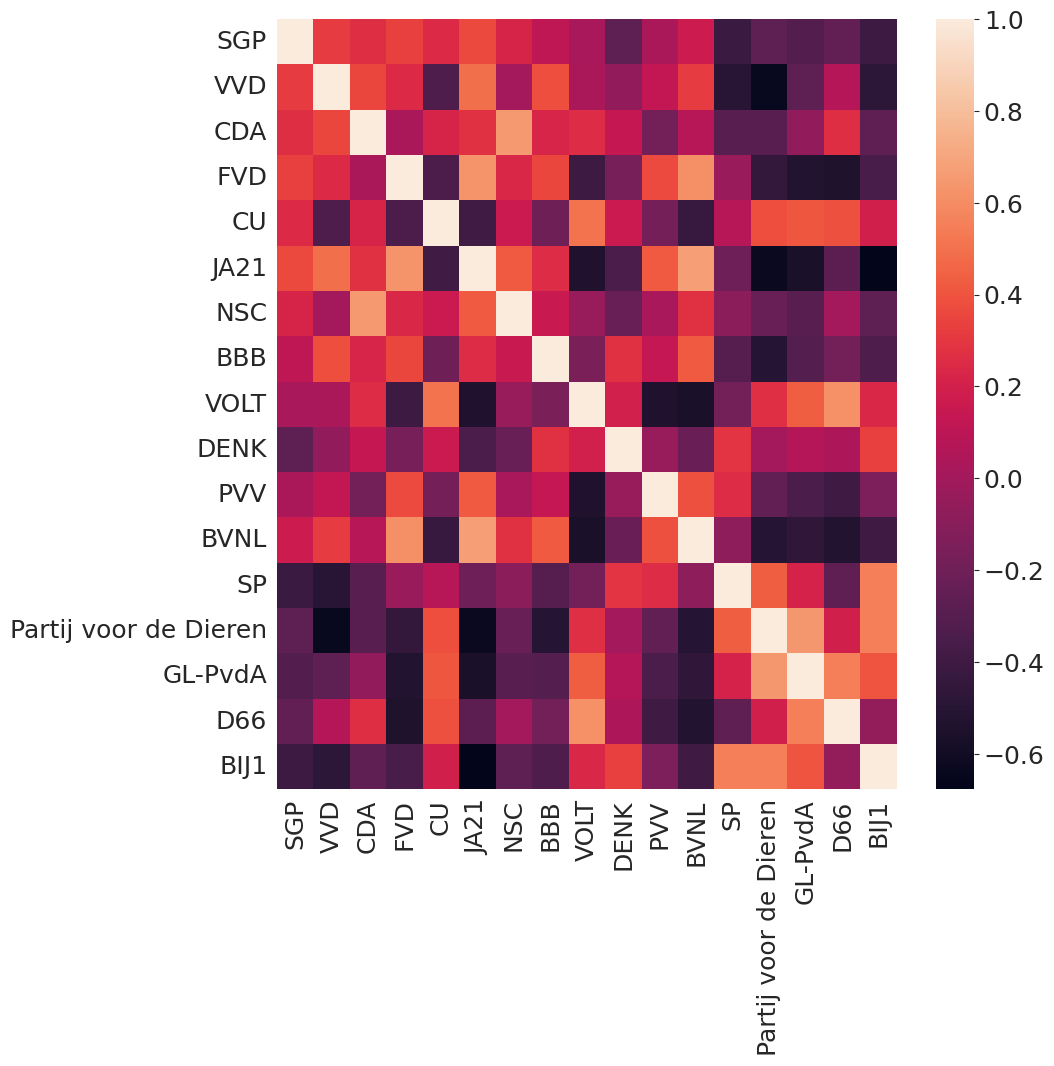

In [55]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(stemwijzer_df.corr())

In [56]:
stemwijzer_df.corr()

,SGP,VVD,CDA,FVD,CU,JA21,NSC,BBB,VOLT,DENK,PVV,BVNL,SP,Partij voor de Dieren,GL-PvdA,D66,BIJ1
SGP,1.000000,0.312527,0.264683,0.330086,0.242056,0.358273,0.219330,0.113996,0.022939,-0.264683,0.027696,0.164488,-0.421332,-0.264683,-0.312527,-0.253024,-0.404716
VVD,0.312527,1.000000,0.353273,0.240300,-0.330514,0.490025,0.009855,0.380019,0.029053,-0.064684,0.127558,0.318182,-0.497568,-0.641863,-0.267677,0.063564,-0.476072
CDA,0.264683,0.353273,1.000000,0.028989,0.217078,0.273402,0.650516,0.226604,0.257603,0.137255,-0.180962,0.079611,-0.289216,-0.289216,-0.064684,0.260927,-0.263048
FVD,0.330086,0.240300,0.028989,1.000000,-0.341309,0.631187,0.239237,0.354436,-0.410337,-0.169100,0.366624,0.613010,-0.028989,-0.449323,-0.524737,-0.545205,-0.349760
CU,0.242056,-0.330514,0.217078,-0.341309,1.000000,-0.394748,0.158676,-0.207762,0.507557,0.157640,-0.174902,-0.430193,0.082696,0.382471,0.406585,0.385162,0.188390
JA21,0.358273,0.490025,0.273402,0.631187,-0.394748,1.000000,0.417118,0.256188,-0.533440,-0.344832,0.418015,0.670034,-0.201973,-0.630550,-0.562528,-0.275326,-0.677076
NSC,0.219330,0.009855,0.650516,0.239237,0.158676,0.417118,1.000000,0.148796,-0.041231,-0.228166,0.022402,0.275946,-0.087383,-0.228166,-0.295656,0.005168,-0.270336
BBB,0.113996,0.380019,0.226604,0.354436,-0.207762,0.256188,0.148796,1.000000,-0.149049,0.273402,0.131340,0.417521,-0.298033,-0.512321,-0.307515,-0.180929,-0.335421
VOLT,0.022939,0.029053,0.257603,-0.410337,0.507557,-0.533440,-0.041231,-0.149049,1.000000,0.195154,-0.533654,-0.565213,-0.182143,0.270613,0.430512,0.617731,0.234474
DENK,-0.264683,-0.064684,0.137255,-0.169100,0.157640,-0.344832,-0.228166,0.273402,0.195154,1.000000,-0.037700,-0.223906,0.289216,0.004902,0.064684,0.041748,0.335013


## 2.3 StemmenTracker

Gemaakt door de organisatie achter de **StemWijzer*, onderscheid de [StemmenTracker](https://www.stemmentracker.nl/) zich door net als **Check je stem** het stemgedrag van de partijen als data te gebruiken. De StemmenTracker loopt in mindere mate tegen het zelfde probleem als **Check je stem** aan, namelijk dat zowel BIJ1 (4) als de NSC (4) niet bij alle stemmingen aanwezig waren.

Omdat de afwezigheid van beide partijen geen overlap heeft, zou ik van de 30 stellingen er 8 moeten weggooien om beide partijen mee te nemen. Ik heb er daarom voor gekozen om ook hier BIJ1 weg te laten maar NSC wel mee te nemen. Hierdoor blijven er 26 stellingen over.

Het stemgedrag van Groenlinks en de PvdA had 100% overlap en zijn daarom samengevoegd tot de 'GL-PvdA' combinatie waarmee ze in de verkiezingen ook op de lijst staan.



In [57]:
# Load data and prepare DataFrame for analysis
stemmen_tracker_df = pd.read_csv('data/stemmentracker.csv')
stemmen_tracker_df = stemmen_tracker_df.dropna(axis=1)
stemmen_tracker_labels = stemmen_tracker_df.columns[1:]
stemmen_tracker_df =stemmen_tracker_df.iloc[1:]
stemmen_tracker_questions = stemmen_tracker_df["Motie"]
stemmen_tracker_df = stemmen_tracker_df.iloc[:, 1:]

# Prepared DataFrame is assigned its own variable to allow the original to be used in the Merged model.
stemmen_tracker_df_prepared = pd.DataFrame(data=stemmen_tracker_df, columns=stemmen_tracker_labels)
stemmen_tracker_df_prepared = stemmen_tracker_df_prepared.rename(index=stemmen_tracker_questions)
stemmen_tracker_df_prepared = stemmen_tracker_df_prepared.transpose()

### How many components verhaal

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [79.94%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

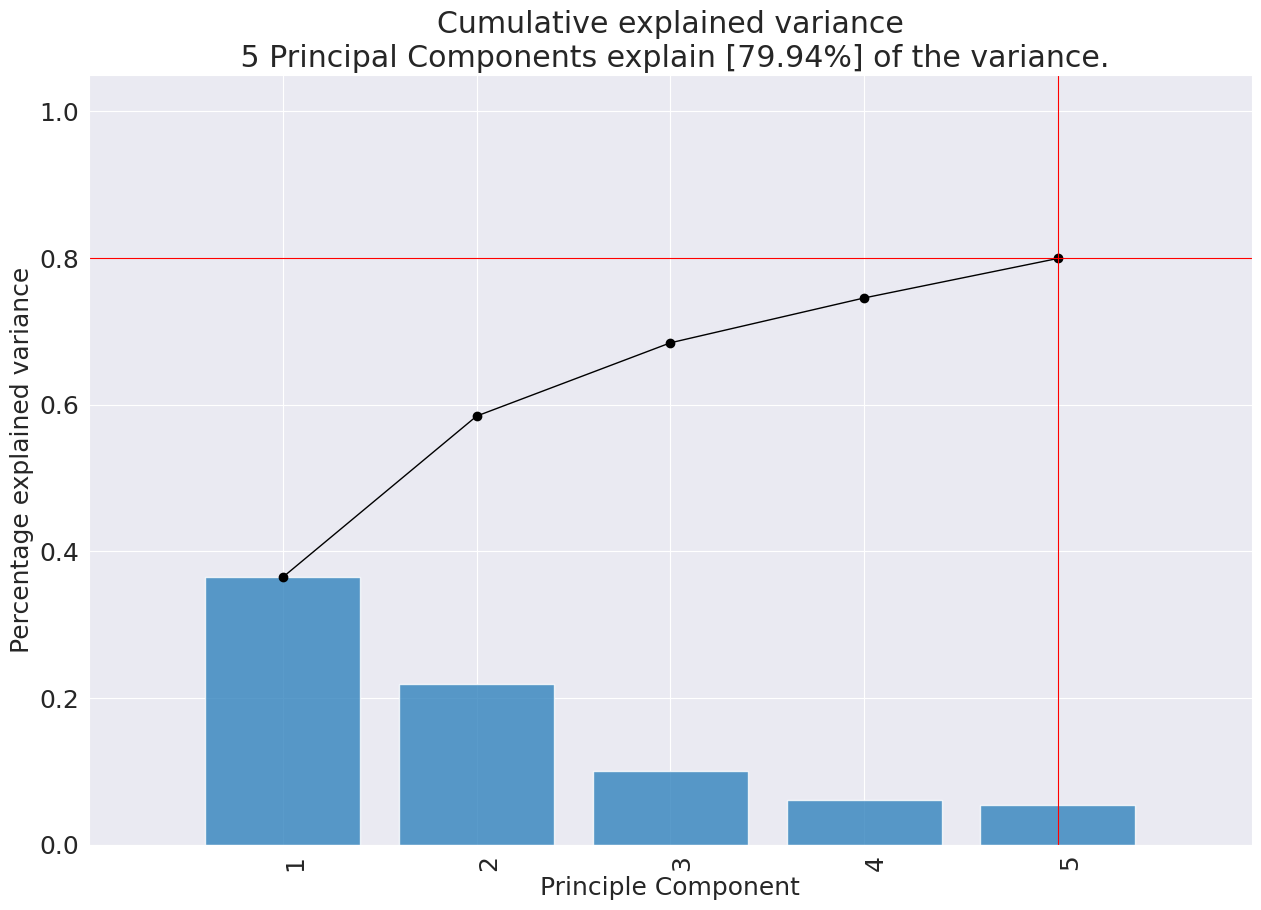

In [58]:
model = pca(n_components=5)
results = model.fit_transform(stemmen_tracker_df_prepared, row_labels=stemmen_tracker_labels)
model.plot()

### Scatterplot verhaal

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [58.45%] of the variance'}, xlabel='PC1 (36.4% expl.var)', ylabel='PC2 (21.9% expl.var)'>)

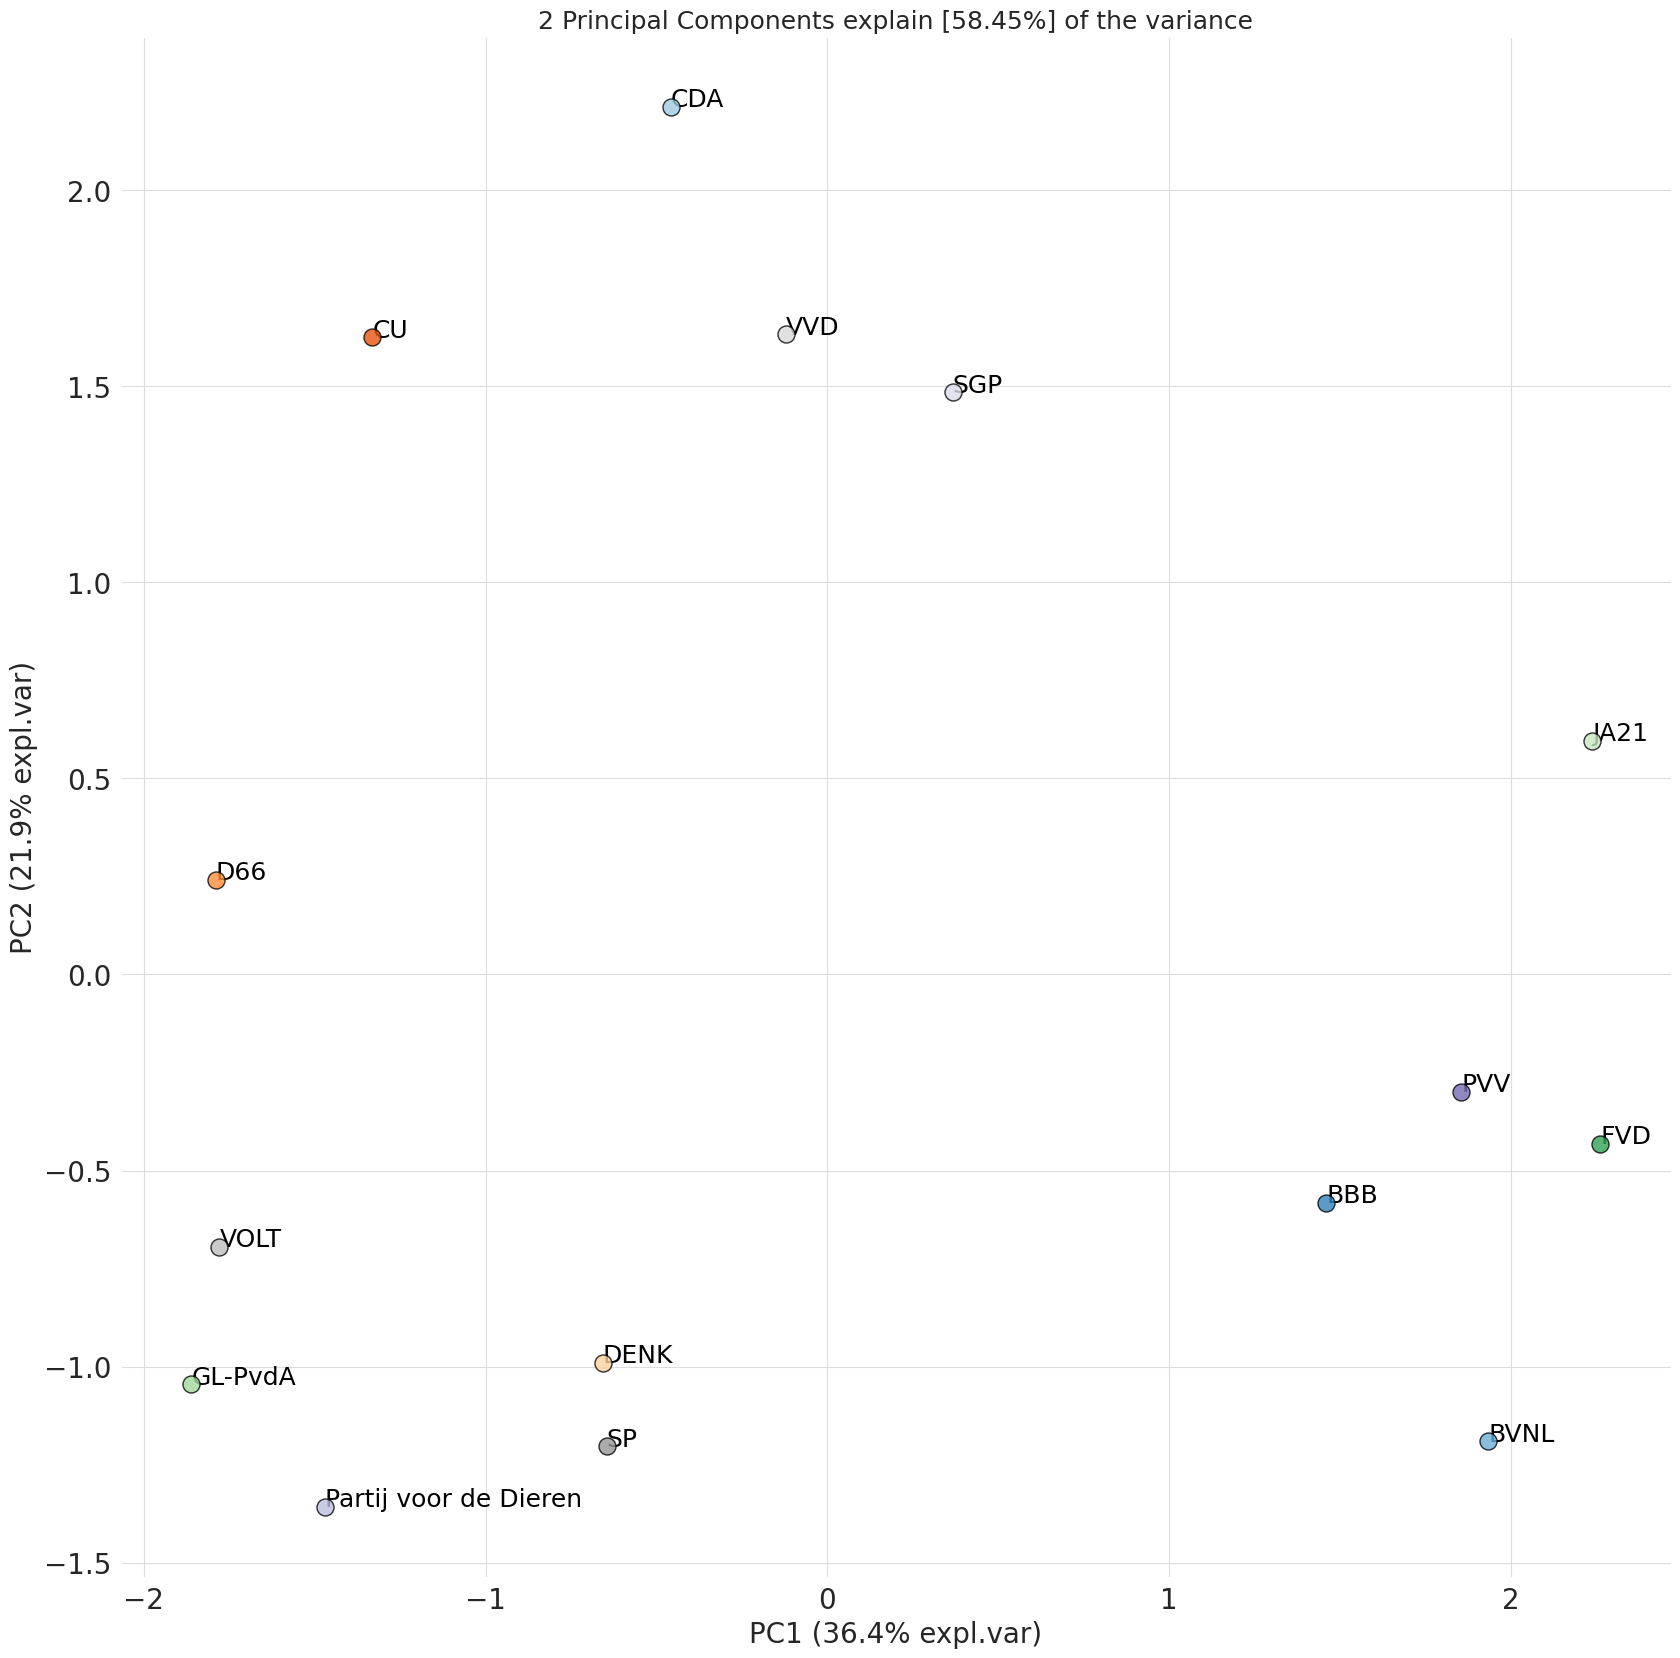

In [59]:
model = pca(n_components=2)
results = model.fit_transform(stemmen_tracker_df_prepared, row_labels=stemmen_tracker_labels)
model.scatter(legend=False, figsize=(20,20), labels=stemmen_tracker_labels)

### Analyse componenten

In [60]:
model.results["loadings"].iloc[0].sort_values(ascending=False)

De regering mag gemeenten niet dwingen om asielzoekers op te vangen                                                                                                  0.294002
De regering moet mensen die naar Islamitische Staat zijn gereisd niet terughalen naar Nederland                                                                      0.290452
De overheid mag boeren niet dwingen hun land te verkopen                                                                                                             0.283333
Vluchtelingen die in Nederland mogen blijven mogen geen voorrang krijgen voor een sociale huurwoning                                                                 0.279783
Het moet verboden blijven voor politieagenten om een hoofddoek te dragen                                                                                             0.258387
De regering moet eigenaren van huizen niet verplichten hun huis te verwarmen met een warmtepomp                                   

In [61]:
model.results["loadings"].iloc[1].sort_values(ascending=False)

De regering moet de nieuwe pensioenwet invoeren                                                                                                                      0.263609
Coffeeshops mogen alleen nog softdrugs verkopen aan mensen die in dezelfde gemeente wonen                                                                            0.195528
Eigenaren van vrachtwagens moeten per gereden kilometer belasting gaan betalen                                                                                       0.139892
De hoogste straf voor doodslag moet omhoog van 15 naar 25 jaar gevangenisstraf                                                                                       0.137954
Het moet makkelijker worden om een lerarenopleiding te doen                                                                                                          0.108654
Het moet verboden blijven voor politieagenten om een hoofddoek te dragen                                                          

In [62]:
model.results["topfeat"]

,PC,feature,loading,type
0,PC1,De regering mag gemeenten niet dwingen om asie...,0.294002,best
1,PC2,De regering moet geld steken in een permanente...,-0.376460,best
2,PC2,Iemand die zwanger is en een abortus wil moet ...,-0.236969,weak
3,PC1,Vluchtelingen die in Nederland mogen blijven m...,0.279783,weak
4,PC1,Eigenaren van vrachtwagens moeten per gereden ...,-0.264221,weak
5,PC2,De regering moet ervoor zorgen dat gemeentes s...,0.099106,weak
6,PC1,De regering moet een minimum vaststellen voor ...,-0.208822,weak
7,PC1,Het moet verboden blijven voor politieagenten ...,0.258387,weak
8,PC2,Nederland moet geen F-16-vliegtuigen aan Oekra...,-0.100699,weak
9,PC2,De regering moet de nieuwe pensioenwet invoeren,0.263609,weak


### Correlatie stemgedrag van de partijen

<Axes: >

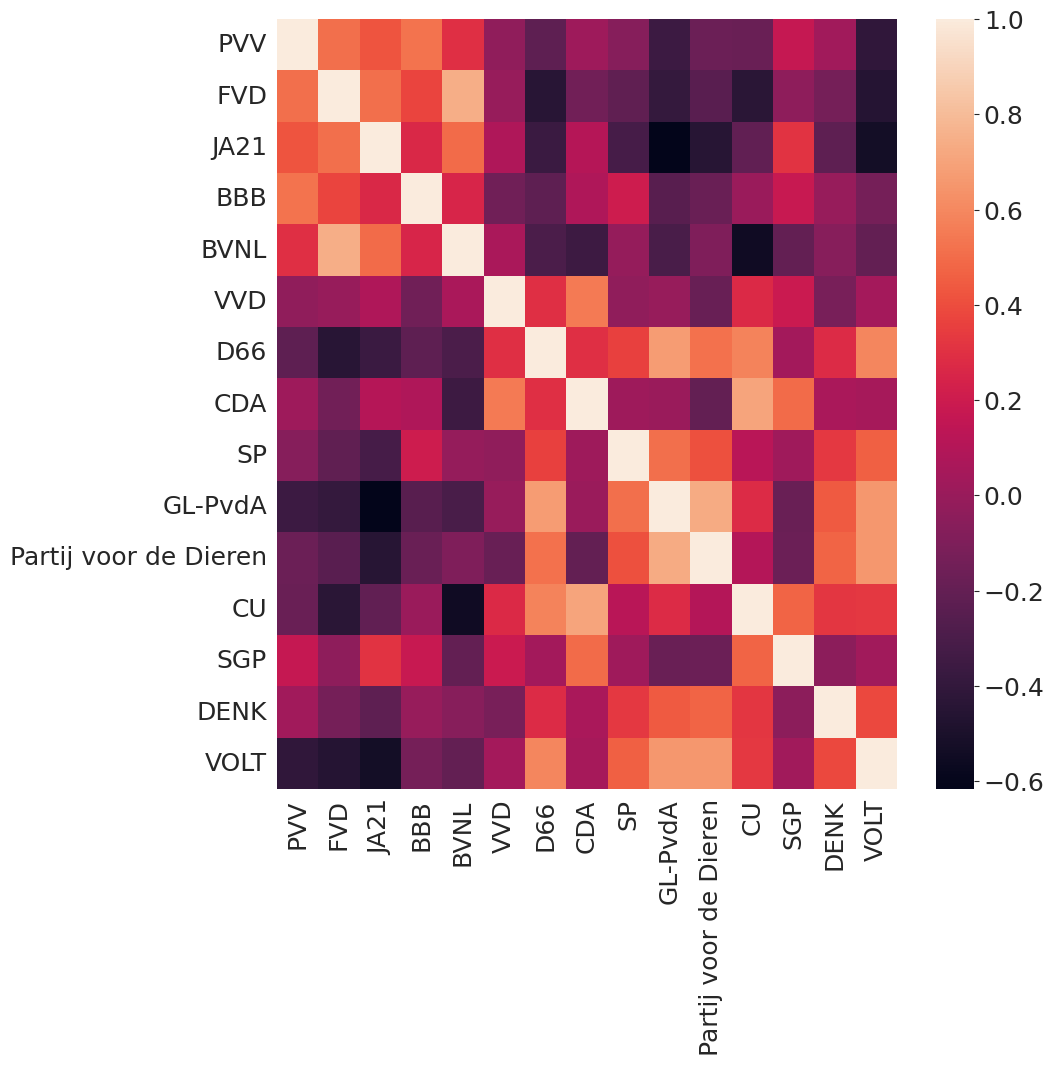

In [63]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(stemmen_tracker_df.corr())

In [64]:
stemmen_tracker_df.corr()

,PVV,FVD,JA21,BBB,BVNL,VVD,D66,CDA,SP,GL-PvdA,Partij voor de Dieren,CU,SGP,DENK,VOLT
PVV,1.000000,0.513088,0.421586,0.526134,0.297406,-0.030934,-0.221332,0.016222,-0.068421,-0.362180,-0.170213,-0.180451,0.170213,0.030934,-0.410513
FVD,0.513088,1.000000,0.509733,0.374465,0.744208,-0.009855,-0.442308,-0.144707,-0.216302,-0.394231,-0.239237,-0.438557,-0.038278,-0.133045,-0.454551
JA21,0.421586,0.509733,1.000000,0.264683,0.495761,0.079611,-0.368949,0.109589,-0.314920,-0.616534,-0.449323,-0.208979,0.309211,-0.223906,-0.531457
BBB,0.526134,0.374465,0.264683,1.000000,0.253024,-0.153522,-0.219330,0.080508,0.201498,-0.246077,-0.175691,0.005483,0.175691,-0.005483,-0.133099
BVNL,0.297406,0.744208,0.495761,0.253024,1.000000,0.063564,-0.294582,-0.355556,-0.016222,-0.304919,-0.097725,-0.550889,-0.200594,-0.063564,-0.200594
VVD,-0.030934,-0.009855,0.079611,-0.153522,0.063564,1.000000,0.295656,0.550889,-0.030934,-0.009855,-0.186355,0.267677,0.186355,-0.121212,0.044137
D66,-0.221332,-0.442308,-0.368949,-0.219330,-0.294582,0.295656,1.000000,0.294582,0.362180,0.673077,0.516752,0.581457,0.038278,0.275946,0.593308
CDA,0.016222,-0.144707,0.109589,0.080508,-0.355556,0.550889,0.294582,1.000000,0.016222,0.005168,-0.200594,0.704503,0.498914,0.063564,0.051434
SP,-0.068421,-0.216302,-0.314920,0.201498,-0.016222,-0.030934,0.362180,0.016222,1.000000,0.513088,0.410513,0.118582,0.025031,0.329967,0.460576
GL-PvdA,-0.362180,-0.394231,-0.616534,-0.246077,-0.304919,-0.009855,0.673077,0.005168,0.513088,1.000000,0.732066,0.275946,-0.177036,0.438557,0.655510


## 2.4 Kieskompas

Het [Kieskompas](https://www.kieskompas.nl/) is een stemwijzer gemaakt door de krant Trouw met 30 stellingen. De partijen worden na afloop op een 2d grafiek geplaatst met 'links/ rechts' en 'progressief / conservatief' als assen.

De vragen worden op een [Likert scale](https://en.wikipedia.org/wiki/Likert_scale) beantwoord met -2, -1, 0, 1 en 2. Het Kieskompas bevat ook de optie 'geen mening' maar deze is door geen van de partijen gebruikt en is daarom niet meegenomen in de codering.

In [65]:
# Load data and prepare DataFrame for analysis
kieskompas_df = pd.read_csv('data/kieskompas.csv')
kieskompas_df = kieskompas_df.dropna(axis=1)
kieskompas_df_labels = kieskompas_df.columns[1:]
kieskompas_df =kieskompas_df.iloc[1:]
kieskompas_df_questions = kieskompas_df["stelling (-2; -1; 0=neutraal; 1; 2)"]
kieskompas_df = kieskompas_df.iloc[:, 1:]

# Prepared DataFrame is assigned its own variable to allow the original to be used in the Merged model.
kieskompas_df_prepared = pd.DataFrame(data=kieskompas_df, columns=kieskompas_df_labels)
kieskompas_df_prepared = kieskompas_df_prepared.rename(index=kieskompas_df_questions)
kieskompas_df_prepared = kieskompas_df_prepared.transpose()

### How many components verhaal

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [91.70%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

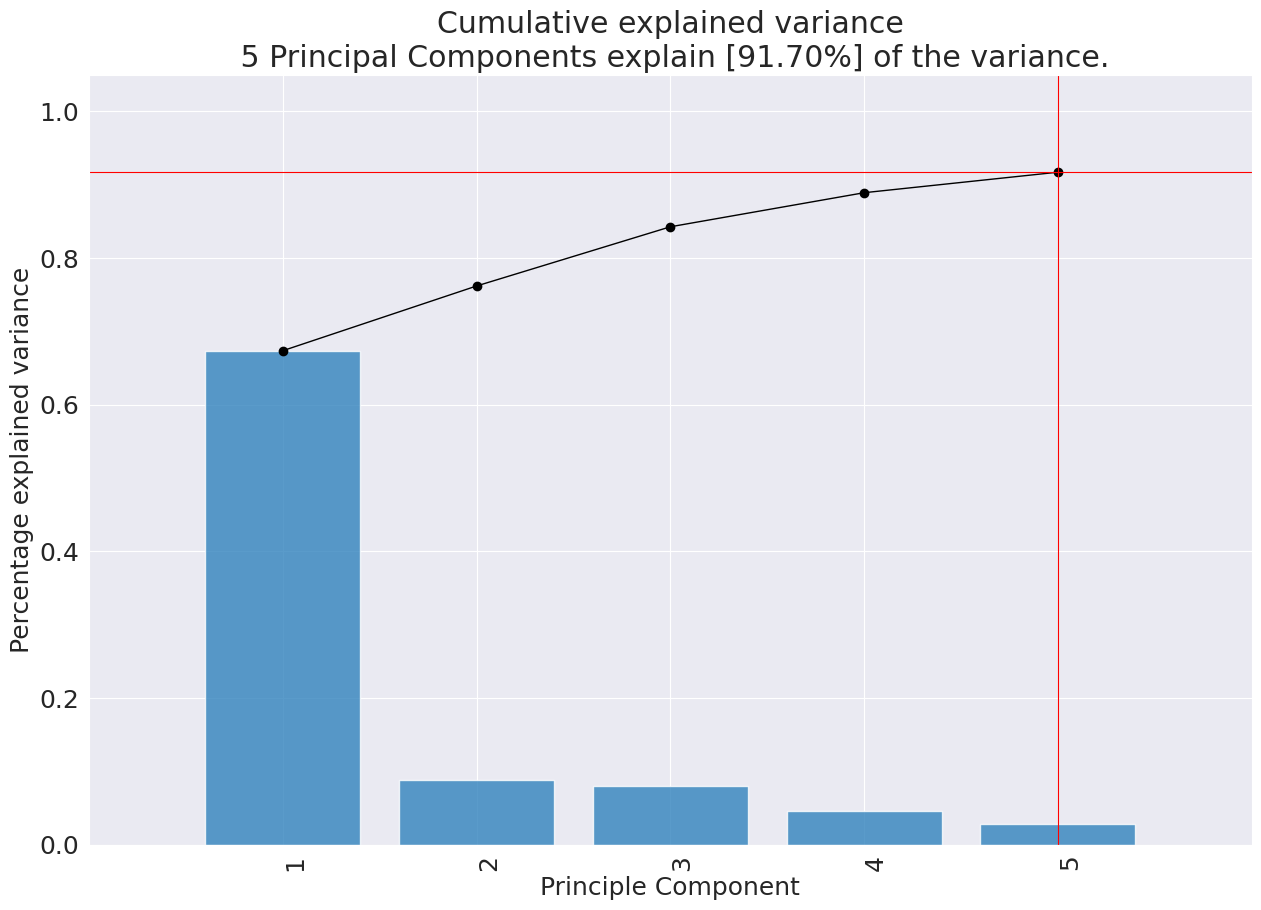

In [66]:
model = pca(n_components=5)
results = model.fit_transform(kieskompas_df_prepared, row_labels=kieskompas_df_labels)
model.plot()

### Scatterplot verhaal

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [91.70%] of the variance'}, xlabel='PC1 (67.3% expl.var)', ylabel='PC2 (8.82% expl.var)'>)

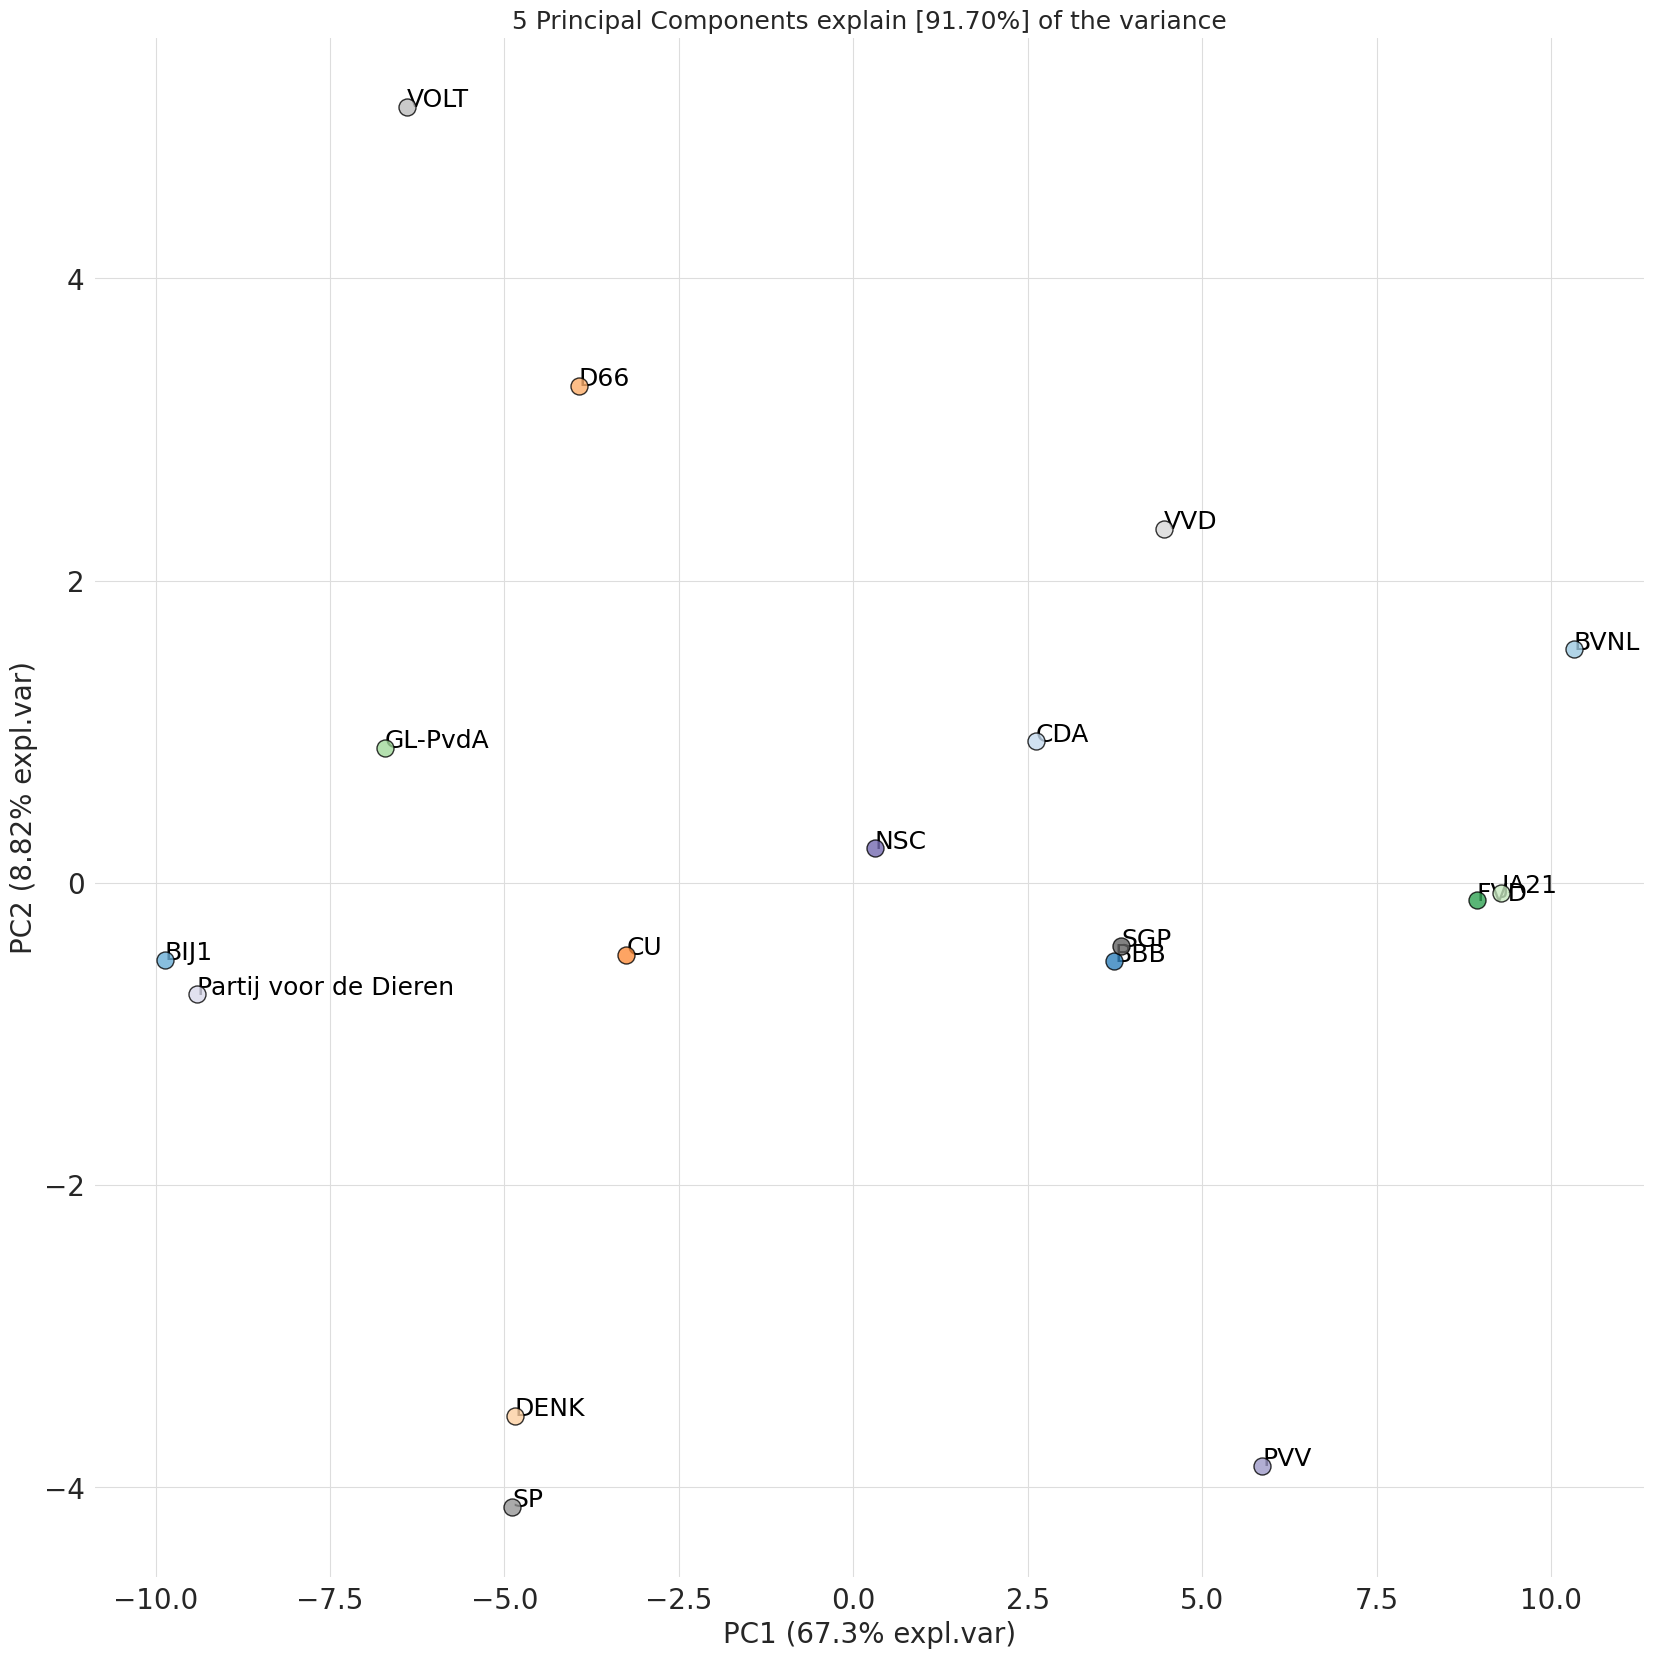

In [67]:
model = pca(n_components=5)
results = model.fit_transform(kieskompas_df_prepared, row_labels=kieskompas_df_labels)
model.scatter(legend=False, figsize=(20,20), labels=kieskompas_df_labels)

### 3d scatterplot makes sense verhaal

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes3D: title={'center': '5 Principal Components explain [91.70%] of the variance'}, xlabel='PC1 (67.3% expl.var)', ylabel='PC2 (8.82% expl.var)', zlabel='PC3 (8.07% expl.var)'>)

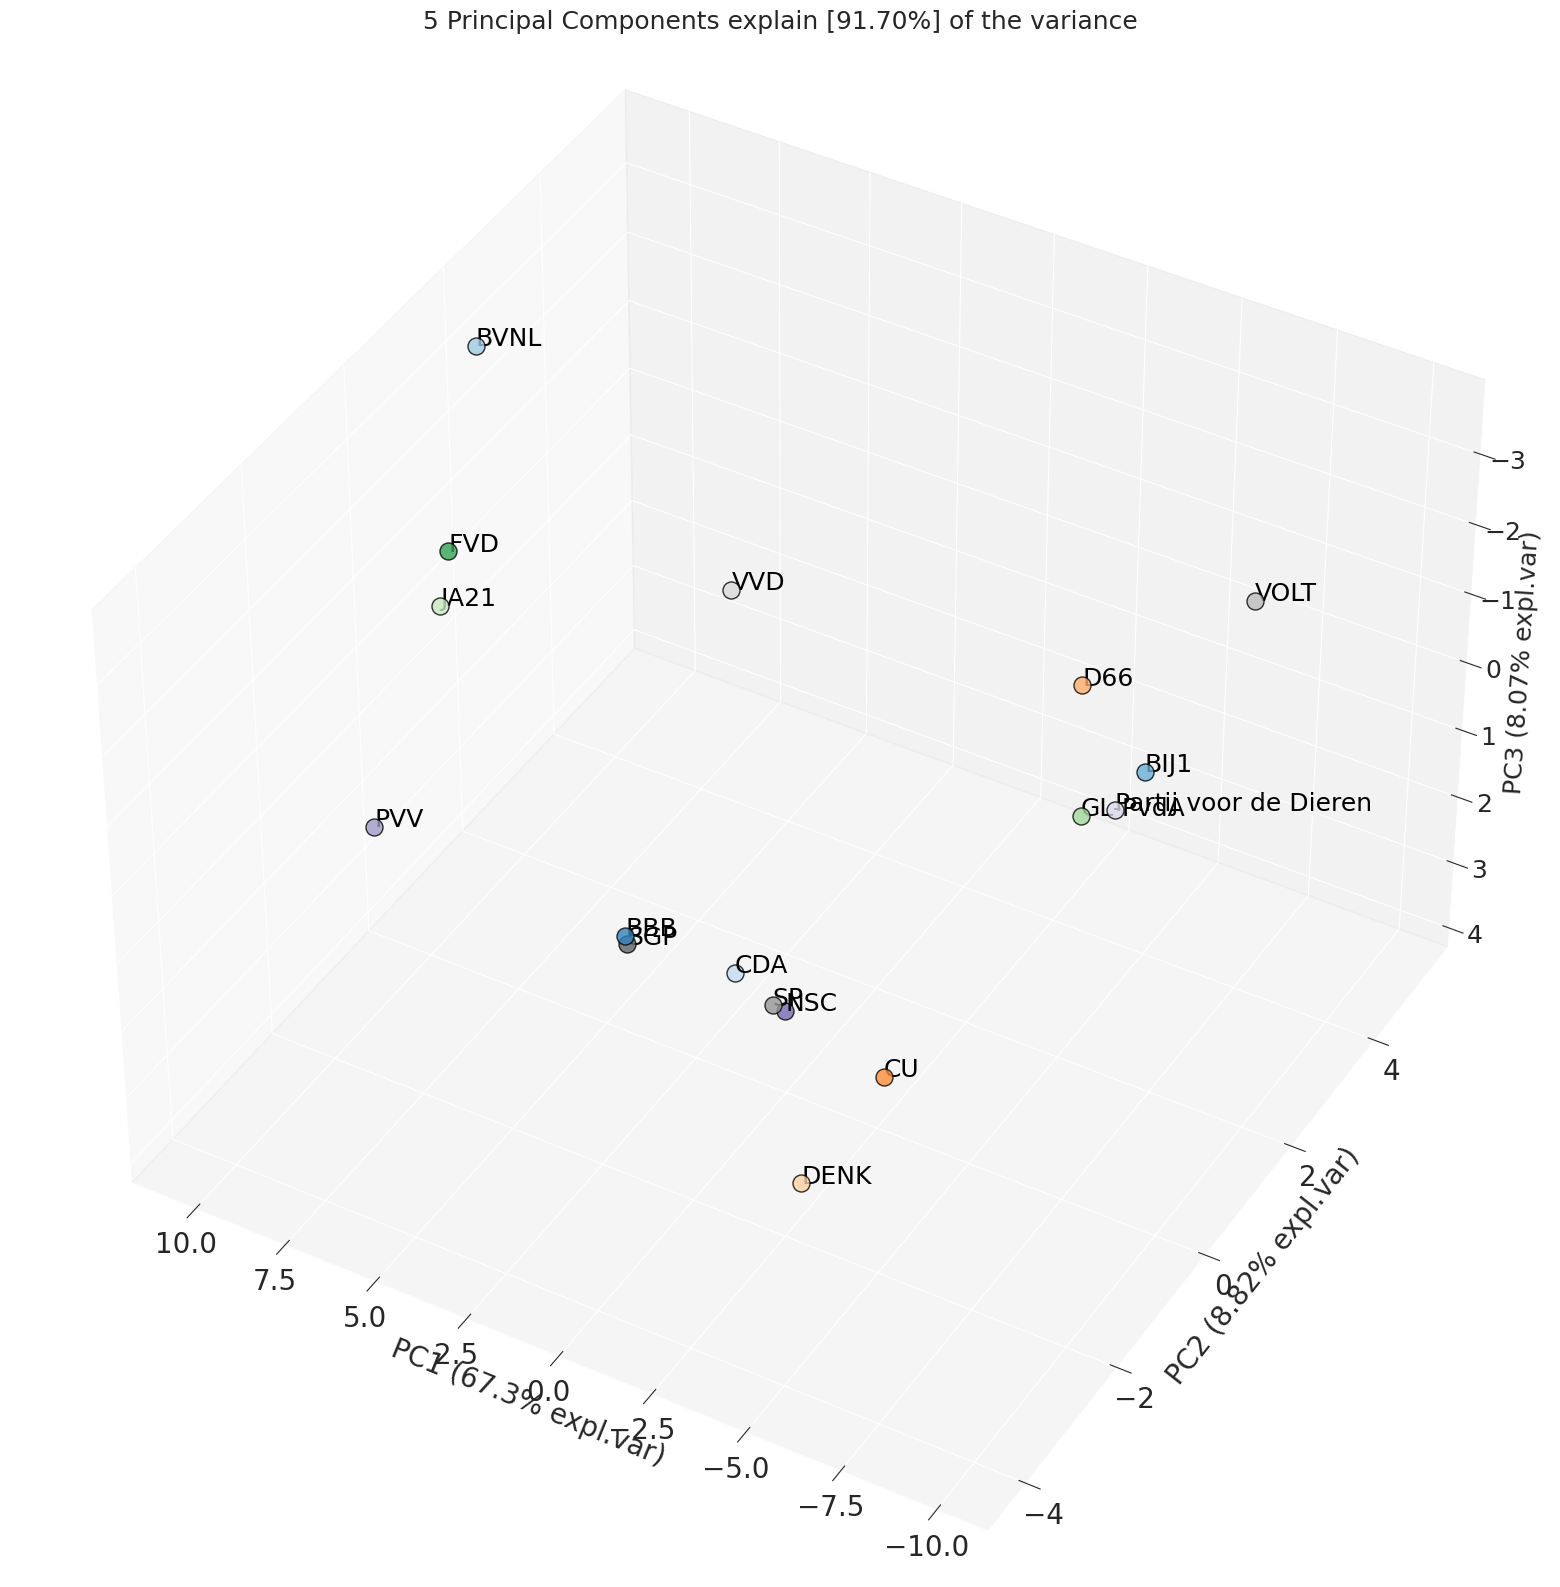

In [68]:
model = pca(n_components=5)
results = model.fit_transform(kieskompas_df_prepared, row_labels=kieskompas_df_labels)
model.scatter3d(legend=False, figsize=(20,20), labels=kieskompas_df_labels)

### scatter 1d as well verhaal

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '1 Principal Components explain [67.37%] of the variance'}, xlabel='PC1 (67.3% expl.var)', ylabel='PC2 (0% expl.var)'>)

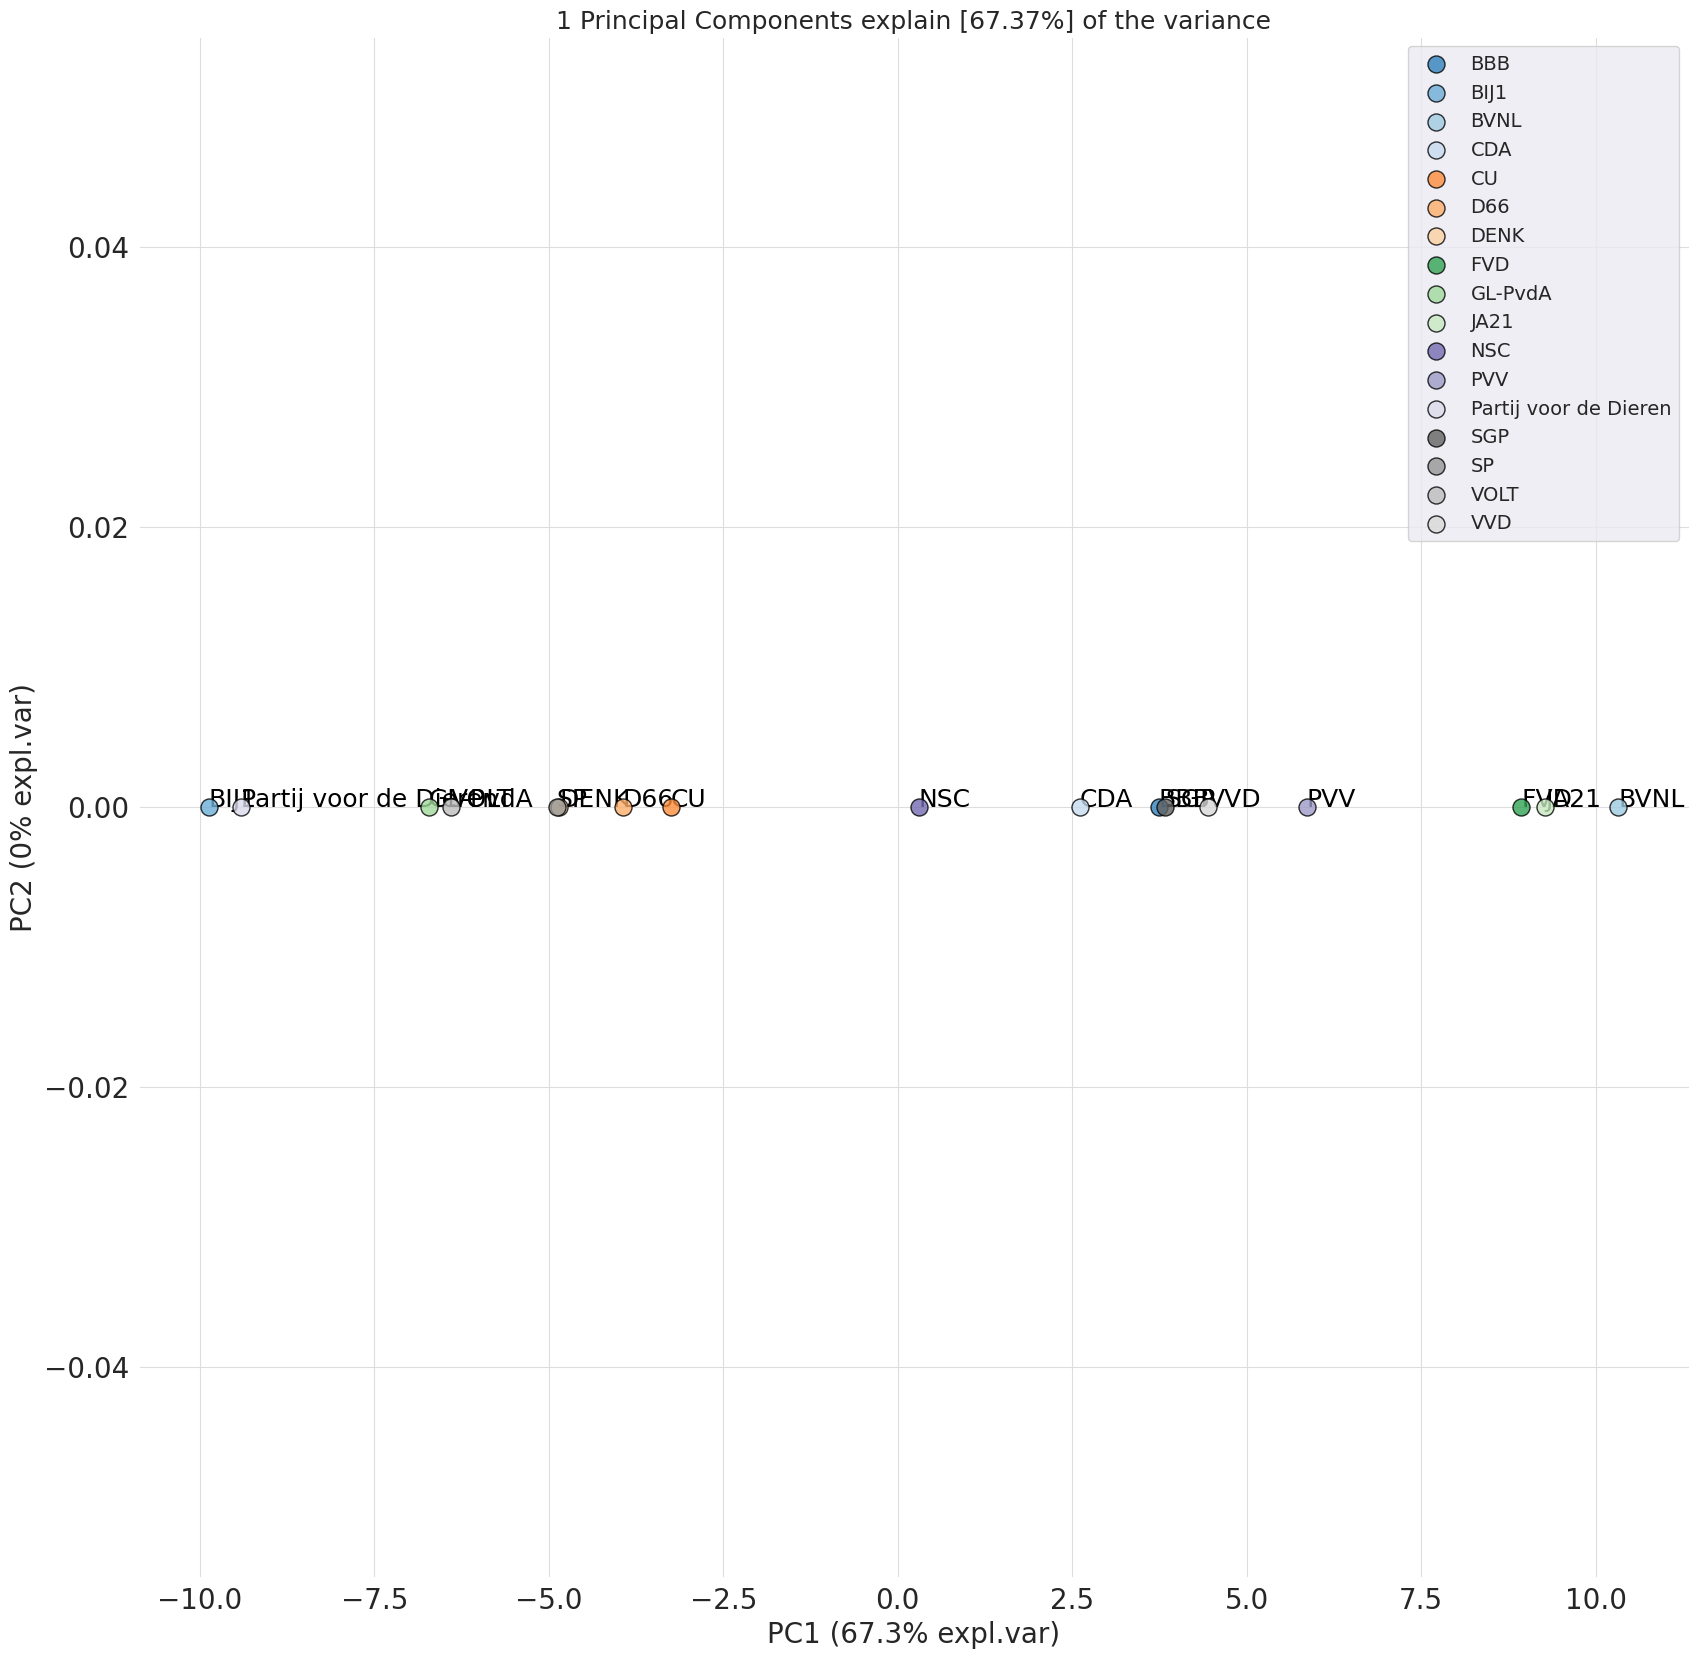

In [69]:
model = pca(n_components=1)
results = model.fit_transform(kieskompas_df_prepared, row_labels=kieskompas_df_labels)
model.scatter(legend=1, figsize=(20,20), labels=kieskompas_df_labels)

### Analyse componenten

In [70]:
model.results["loadings"].iloc[0].sort_values(ascending=False)

Nederland moet minder vluchtelingen toelaten via gezinshereniging; ook al blijven gezinsleden hierdoor van elkaar gescheiden                                          0.245223
Rechters moeten vaker gevangenisstraffen geven in plaats van taakstraffen                                                                                             0.240828
Bij een begrotingstekort kan de overheid beter bezuinigen dan de belastingen verhogen                                                                                 0.216290
Schiphol moet meer ruimte krijgen om te groeien                                                                                                                       0.206535
Zolang we in Nederland nog aardgas gebruiken; moeten gasboringen zijn toegestaan                                                                                      0.200404
Er moeten meer koopwoningen worden gebouwd; ook als er dan minder sociale huurwoningen komen                                 

In [71]:
model.results["loadings"].iloc[1].sort_values(ascending=False)

IndexError: single positional indexer is out-of-bounds

In [ ]:
model.results["topfeat"]

In [ ]:
model.results["loadings"]

### Correlatie standpunten van de partijen

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(kieskompas_df.corr())

In [ ]:
kieskompas_df.corr()

# 3. Conclusie